<a href="https://colab.research.google.com/github/Rajdip-projects/TECHNOHACKS/blob/main/House_price_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name - Rajdip Khan
DATA SCIENCE INTERNSHIP @ TECHNOHACKS
EDUTECH

TASK 1

PROJECT NAME - House Price Prediction

### **Connect with the GitHub Repositories**

In [1]:
!git clone https://github.com/Rajdip-projects/TECHNOHACKS.git

Cloning into 'TECHNOHACKS'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 1005.46 KiB | 3.49 MiB/s, done.


Load and Preprocess the Data

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/TECHNOHACKS/kc_house_data.csv')

# Data preprocessing
df['date'] = pd.to_datetime(df['date'])
df = df.drop(['id', 'date'], axis=1)


Exploratory Data Analysis (EDA)

In [3]:
# For example, checking correlations
correlation_matrix = df.corr()
print(correlation_matrix['price'].sort_values(ascending=False))


price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64


Feature Selection

In [4]:
# Assume all features are selected for simplicity in this example
X = df.drop('price', axis=1)
y = df['price']


Split the Data

In [5]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Model Selection

In [7]:
from sklearn.ensemble import RandomForestRegressor

# Model selection and training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Evaluate the Model

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')


MAE: 72784.7417911338
MSE: 22107027433.379547
R²: 0.8537669783701961


Make Predictions

In [9]:
# Predict the price of a new house
new_house = [[3, 2.5, 2000, 6000, 2, 0, 0, 3, 7, 1500, 500, 1995, 0, '98103', 47.6591, -122.336, 1800, 6000]]
new_house_scaled = scaler.transform(new_house)
predicted_price = model.predict(new_house_scaled)
print(f'Predicted Price: ${predicted_price[0]:,.2f}')


Predicted Price: $660,253.01


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Distribution of House Prices

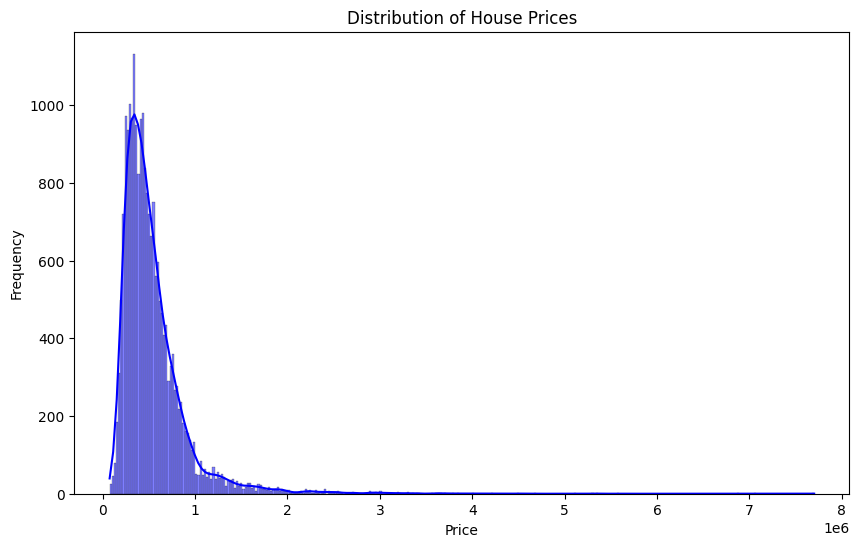

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


Correlation Matrix

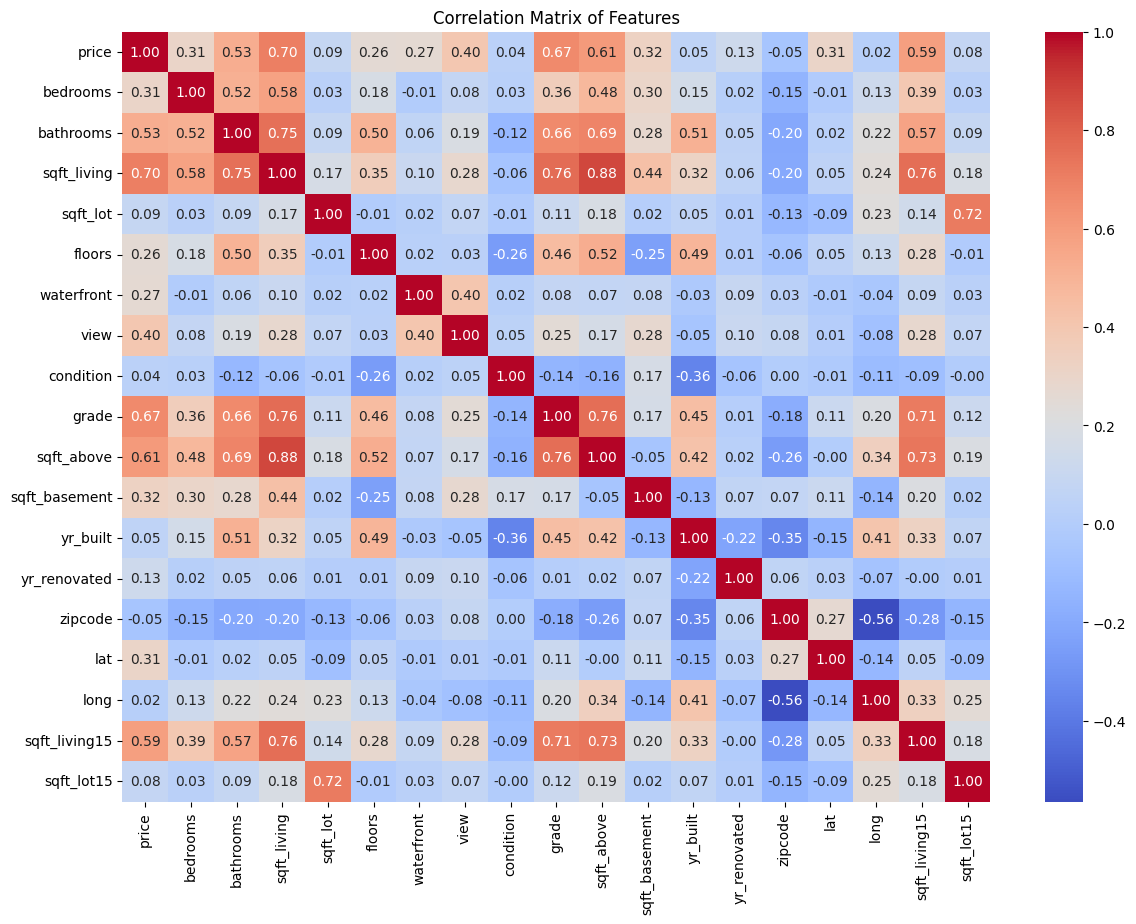

In [12]:
# Plotting the correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Features')
plt.show()


Price vs. Square Footage of Living Area

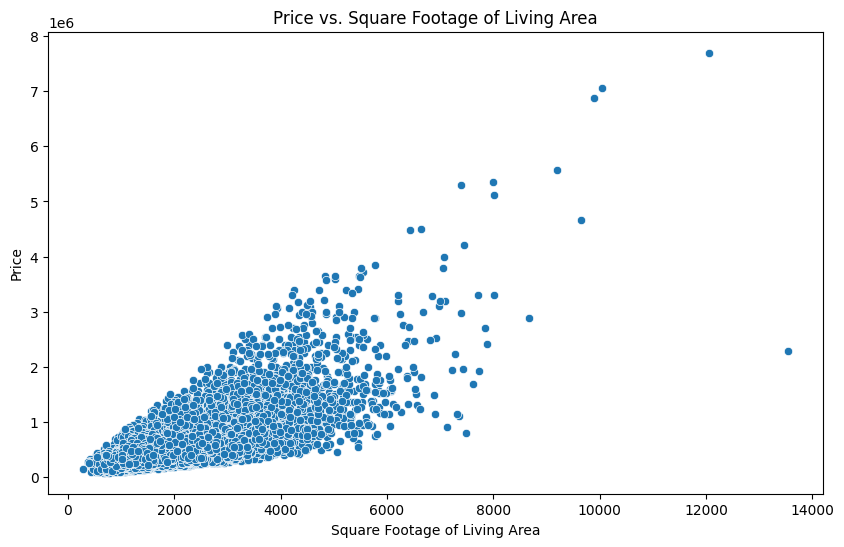

In [13]:
# Scatter plot between 'sqft_living' and 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['sqft_living'], y=df['price'])
plt.title('Price vs. Square Footage of Living Area')
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price')
plt.show()


Price Distribution by Number of Bedrooms

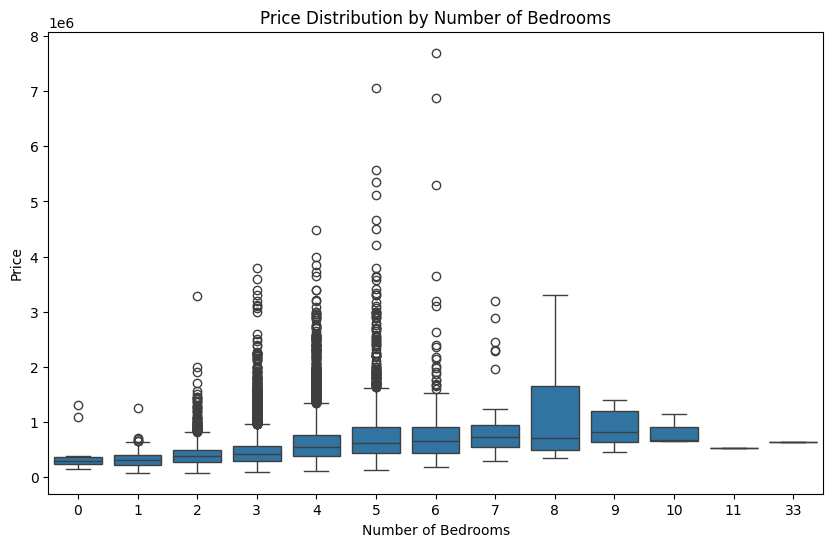

In [14]:
# Box plot to check the distribution of prices by number of bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['bedrooms'], y=df['price'])
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()
